# Demonstration of Open Authentication (OATH)

OATH tokens have two implementations: Time based [TOTP](https://en.wikipedia.org/wiki/Time-based_One-Time_Password) and HMAC based [HOTP](https://en.wikipedia.org/wiki/HMAC-based_One-Time_Password)

Google Authenticator is a popular example of web sites using OATH as an alternative to passwords.  


## Lesson #1 Registration of a user's secret

In [ ]:
# The secret has a special format of 16 [base32](https://en.wikipedia.org/wiki/Base32) 'digits'
# generateSecret will create a properly formatted random secret

import google_authenticator as ga

print( "Secret1= %s" % ga.generateSecret())
print( "Secret2= %s" % ga.generateSecret())
print( "Secret3= %s" % ga.generateSecret())


In [ ]:
import google_authenticator as ga
from IPython.display import display, HTML

secret = ga.generateSecret()
name = 'yourname'
ga.registerUser({'name':name,'secret':secret})
print("Registered %s, secret= %s" % (name, secret))

totp = ga.currentTOTP(name)
display(HTML(ga.validateTOTP({'name':name,'code':totp})))
   
   


## Lesson #2 TOTP codes expire after 30 seconds

In [ ]:
# This code snipet shows how token code rollover every 30 seconds
# Old codes will not validate, this reduces the concern about them being stolen

import google_authenticator as ga

totp = ga.currentTOTP(name)
print("Current code= %s" % totp)
display(HTML(ga.validateTOTP({'name':name,'code':totp})))

# This will show the current code, then wait for the next time interval
ga.rolloverTOTP(name)
   

# The first code is now invalid
display(HTML(ga.validateTOTP({'name':name,'code':totp})))


 ## Lesson #3 HOTP codes are only valid once

In [ ]:
# This code snipet shows how HOTP code becomes invalid after one use
# Unlike TOTP codes that are based on a secret and the time
# HOTP codes are based on a secret and a counter.
# Everytime a code is validated the counter is incremented, thus invalidating 
# previous codes.  The TOTP method generally preferred because it avoids
# issues caused by the client and server counters getting out of sync.

import google_authenticator as ga

# google_authenitcator module maintains the counter as a variable
print('HOTP counter= %d' % ga.HOTP_COUNTER)

hotp = ga.currentHOTP(name)
print("Current code= %s" % hotp)
display(HTML(ga.validateHOTP({'name':name,'code':hotp})))

# The first code is now invalid
print('HOTP counter= %d' % ga.HOTP_COUNTER)
display(HTML(ga.validateHOTP({'name':name,'code':hotp})))


In [ ]:
# Most HOTP implementations allow for a small of counters to be valid
# because the client increments when it generates a code
# and the server increments when it recieves.  Unsend codes and 
# communication failures will unsync the clinet/server counters
# This module uses a sync range of 10

import google_authenticator as ga

# Current counter and code
print('HOTP counter= %d' % ga.HOTP_COUNTER)
hotp = ga.currentHOTP(name)
print("Current code= %s" % hotp)
display(HTML(ga.validateHOTP({'name':name,'code':hotp})))

# Set the server counter back 5, this will still validate
ga.HOTP_COUNTER -= 5
print('HOTP counter= %d' % ga.HOTP_COUNTER)
hotp = ga.currentHOTP(name)
print("Current code= %s" % hotp)
display(HTML(ga.validateHOTP({'name':name,'code':hotp})))

# Set the server counter back 15, this will not validate
ga.HOTP_COUNTER -= 15
print('HOTP counter= %d' % ga.HOTP_COUNTER)
hotp = ga.currentHOTP(name)
print("Current code= %s" % hotp)
display(HTML(ga.validateHOTP({'name':name,'code':hotp})))



# Lesson #4 Sending TOTP and HOTP tokens to a website

In this lesson you will register a secret for your name and experiment with sending OATH tokens.  

A simple OATH server is running on [kali.cyber-unh.org](http://kali.cyber-unh.org:8080/)  
The new tab you just loaded will look something like this: ![](TOTP-server.png)

### Step 1: Register your name and secret

Enter your name and click "registerUser", optionally you can replace the secret
with one you generated earlier in this lesson.  This is the same as using the follwoing URL:
http://kali.cyber-unh.org/registerUser?name=[yourname]?secret=[yoursecret]  

You will see a confirmation of your secret.

### Step 2: Submit a TOTP token
Show your tokens: http://kali.cyber-unh.org:8080/name=[yourname]
Notice how many seconds your TOTP token is good for.  It will never be more than 30 seconds.
On the "Validate TOTP for user" line.  Enter your name and current TOTP token, click "validate TOTP"

If you clicked before time ran out you will "Validated"  if not "Failed".
You can use the back arrow and refresh to get a new token if you failed.  What is the minimum number of
seconds you need to complete the form before the token expires?

### Step 3: Submit a HOTP token
Again show your tokens: http://kali.cyber-unh.org:8080/name=[yourname]
HOTP tokens are not time sensitive but are limited to a single use.

On the "Validate HOTP for user" line.  Enter your name and current HOTP token, click "validate HOTP"
You should see "Validated"
Go back, and enter the same again, click "Validate HOTP"
This time it will fail.

In [ ]:
import google_authenticator as ga

secret = '' # Random generated from the server
name = '' # The name you registered
ga.registerUser({'name':name,'secret':secret})
totp = ga.currentTOTP(name)
print("Totp code = %s" % totp)
hotp = ga.currentHOTP(name)
print("Hotp code = %s" % hotp)
   


# Extra credit: Create your own OATH server
Copy the google_authenticator.py to the Kali machine.
Modify the code to run on a port that is not 8080.  Only one program can attach to a port at anytime.
Modify the code tomake to more secure, to be used to handle authenication for an website you own.
Or just plain play.

# Extra credit: Google Authenticator

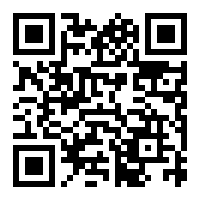

In [1]:
# Google provides an API to generate QR codes to be used with Google Authenticator

import requests
import IPython.display as Disp

# Experiment by changing the variable settings
secret = "yoursecret"
name = "yourname"
website = "https://yoursite"
url = "https://chart.googleapis.com/chart?chs=200x200&chld=M|0&cht=qr&chl=" + website + "?name=" + name + "&secret=" + secret;

# Show the QR code
Disp.Image(requests.get(url).content)

# Result is the website and you now share a secret associated with your name

Can you create a QR code that would allow Google Authenticator to validate against [kali](http://kali.cyber-unh.org:8000)?